In [8]:
import librosa
import IPython.display
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import math

In [9]:
base_file = 'pianoscale 2.wav' #file used to to reference autotune for other file
target_file = 'clarinetnote 2.wav' #file that gets autotuned

In [20]:
y, sr = librosa.load(base_file, sr = 44100) #loading base
base = y
y, sr = librosa.load(target_file, sr = 44100) #loading target
target = y

print(base)

[ -6.10351562e-05  -2.13623047e-04  -7.93457031e-04 ...,  -3.05328369e-02
  -2.93121338e-02  -2.79846191e-02]


In [11]:
IPython.display.Audio(data=base, rate=sr)

In [12]:
IPython.display.Audio(data=target, rate=sr)

In [21]:
pitches, magnitudes = librosa.core.piptrack(y=base,sr=sr) #pitch & magnitudes over time for base
pitchesOfBase = pitches
magnitudesOfBase = magnitudes

pitches, magnitudes = librosa.core.piptrack(y=target,sr=sr) #pitch & magnitudes over time for target
pitchesOfTarget = pitches
magnitudesOfTarget = magnitudes

print(target.shape)
print(pitchesOfBase.shape)

(352800,)
(1025, 690)


In [22]:
def detect_pitch(y, sr, t, name,name1): #used to get main pitch at certain time (t)
  index = name1[:, t].argmax()
  pitch = name[index, t]

  return pitch


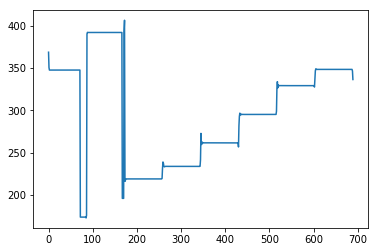

In [26]:
pitch_graph_base = np.empty(pitchesOfBase.shape[1]) #initializes empty array with dimensions of main pitches over time
pitch_graph_target = np.empty(pitchesOfTarget.shape[1])#initializes empty array with dimensions of main pitches over time

for i in range(pitchesOfBase.shape[1]):
    pitch_graph_base[i] = detect_pitch(base,sr,i,pitchesOfBase,magnitudesOfBase) #loading pitches
    
for i in range(pitchesOfTarget.shape[1]):
    pitch_graph_target[i] = detect_pitch(target,sr,i,pitchesOfTarget,magnitudesOfTarget) #loading pitches
    

data_base = pitch_graph_base
data_target = pitch_graph_target



plt.plot(data_base)
plt.show()





In [24]:
def f2midi(frequency): #frequency to midi
    if frequency == 0:
        return 10
    else:
        return int(69 + (12 * ((math.log(frequency/440)) / (math.log(2)))))

def midi2note(midi_num): #midi to note
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
    octave = int(math.floor(midi_num/12))
    index = int(midi_num % 12)
    final = notes[index] + str(octave)
    return final
    
def stepDistance(f1,f2): #calculating semi tones between frequencies
    return f2midi(f1) - f2midi(f2)


In [27]:
autotune_window = 512 # window in which samples are pitch shifted

index = int(math.floor(len(base)/autotune_window)) #how many pitches will be in the final array
print(index)
splitAudio = np.zeros([index,autotune_window]) #initializes array that splits audio array into smaller arrays of window

for i in range(index):
    for j in range(autotune_window):
        splitAudio[i][j] = target[(i*autotune_window) + j] #loading array correspondingly
        
        

for i in range(index): #applying pitch shift autotune
    if stepDistance(data_base[i],data_target[i]) != 0:
        #print(midi2note(f2midi(data_base[i])))
        splitAudio[i] = librosa.effects.pitch_shift(y=splitAudio[i], sr=sr, n_steps=stepDistance(data_base[i],data_target[i]))
        
        
splitAudio = splitAudio.flatten() #flattening array into one big audio file

#NOTES:
#change cutoff and attack so there are no clicks
#make function so that frequencies don't freak out

689


In [28]:
IPython.display.Audio(data=splitAudio, rate=sr)